In [3]:
import Pkg; Pkg.activate("../")
Pkg.instantiate()

  Activating project at `~/Labile/PlateauExperiment.jl`


We will work with the following family of functions
\begin{align}
T_{\alpha,\beta}(x)=T(x,\alpha,\beta)&=\beta - (1+\beta)|x|^{\alpha},
\end{align}
where $\alpha\geq 1$, $\beta\in (-1,1]$ and $x\in [-1,1]$.
We will study the random dynamical system the family with Gaussian additive noise with variance $\sigma$ i.e
\begin{align*}
    X_{n+1}=\tau(T_{\alpha,\beta}(X_n)+\Omega_{\sigma}(n))
\end{align*}
where $\Omega_{\sigma}(n)$ are random variables i.i.d with Gaussian distribution and $\tau:\mathbb{R}\rightarrow [-1,1]$ boundary condition map $\tau(x)=\lfloor x \rfloor-1$, is the representative in $[0.2)$ of $x$ with repect to $x \sim y$ if $x-y=2k$, $k\in \mathbb{Z}$.
We want computing rigorously the Lyapunov exponent for these random dynamical systems
\begin{align*}
	\lambda(\alpha,\beta,\sigma)=\int _{-1}^{1}\ln |T'_{\alpha,\beta}|f_{\sigma}dm,
\end{align*}
where $T'_{\alpha,\beta}(x)=-\alpha (1+\beta)|x|^{\alpha-2}x$.

In [4]:
using RigorousInvariantMeasures, IntervalArithmetic, BallArithmetic
α = interval(3.5)
β = interval(1)
K = 128
FFTNx = 1024

# this builds a fourier basis truncated at frequences [-K, K]
B = FourierAdjoint(K, FFTNx)                          

# this dynamics is defined on [-1, 1]
function T_alpha_beta_zeroone(α, β, x)                
    return β - (1 + β) * abs(x)^α
end

# coordinate change from [-1, 1] to [0, 1]
function τ_1(x)       
    return (x + 1) / 2
end

# coordinate change from [0, 1] to [-1, 1] 

function τ_2(x)     
    return 2 * x - 1
end

T_zeroone(x) = T_alpha_beta_zeroone(α, β, x)   # closure, fixing α and β

# dynamics on [0, 1]
T(x) = τ_1(T_zeroone(τ_2(x)))             

┌ Info: Switching to OpenBLAS with ConsistentFPCSR = 1 flag enabled, guarantees
│         correct floating point rounding mode over all threads.
└ @ BallArithmetic /home/isaia/.julia/packages/BallArithmetic/aiclr/src/BallArithmetic.jl:20
┌ Info: OpenBLAS is giving correct rounding on a (1024,1024) test matrix on 6 threads
└ @ BallArithmetic /home/isaia/.julia/packages/BallArithmetic/aiclr/src/BallArithmetic.jl:27


Generating forwards to /home/isaia/.julia/artifacts/7e6d3d1a151a3d510c0e5a4c8f2c792f53e39777/lib/libopenblas64_.so (clear: 0, verbose: 1, suffix_hint: '(null)')
 -> Autodetected symbol suffix "64_"
 -> Autodetected interface ILP64 (64-bit)
 -> Autodetected normal complex return style
 -> Autodetected gfortran calling convention
 -> CBLAS detected
Processed 5123 symbols; forwarded 4922 symbols with 64-bit interface and mangling to a suffix of "64_"


┌ Warning: This basis breaks the usual interface of the package, i.e., 
│     the dynamic is input as a function instead than a PwMap
└ @ RigorousInvariantMeasures /home/isaia/.julia/packages/RigorousInvariantMeasures/xFVMn/src/Basis/Fourier/FourierAdjoint.jl:21


T (generic function with 1 method)

We will use the following approximation to find the value of the lyaponov exponent $λ(\alpha,\beta,σ)$.
Let $\alpha$ and $\beta$ be fixed, then
\begin{align*}
	|\lambda(\alpha,\beta,\sigma)-\lambda(\alpha,\beta,\sigma,k,s)|\leq \Upsilon \|f_{\sigma}-f_{\sigma,k,s}\|_{L^2}.
\end{align*}
where $f_{\sigma,k,s}$ is a symmetric trigonometric polynomial that approximates the fixed point of $P_{\sigma, K}$ and $\Upsilon = \sqrt{2}((\ln((1+\beta)\alpha)-(\alpha-1))^2+(\alpha-1)^2)^{\frac{1}{2}}$.

In [11]:
Υ = sqrt(interval(2)) * ((log2((β + 1) * α) - (α - 1))^2 + (α - 1)^2)^(1 / 2)

[3.56215, 3.56216]

To calculate $\lambda(\alpha,\beta,\sigma,k,s)$ we need $f_{\sigma,k,s}$ and therefore $f_{\sigma,k}$.

In [14]:
Iπ = interval(π)

[3.14159, 3.1416]

In [15]:
using LinearAlgebra
# D é a matri que vai multiplicar a matriz do operador de tranferencia P para obter a matriz do operador de tranferecia com ruido (obs que D ja está trucanda)

σ = interval(0.1)

D = Diagonal([[exp((-σ^2 * π^2 * interval(k)^2) / 2) for k in 0:K]; [exp((-σ^2 * π^2 * interval(k)^2) / 2) for k in -K:-1]])
Dc, Dr = IntervalArithmetic.mid.(D), IntervalArithmetic.radius.(D)
bD = BallMatrix(Dc, Dr)

257×257 BallMatrix{Float64, Float64, Ball{Float64, Float64}, Diagonal{Float64, Vector{Float64}}, Diagonal{Float64, Vector{Float64}}}:
 1.0 ± 0.0  …              0.0 ± 0.0
 0.0 ± 0.0                 0.0 ± 0.0
 0.0 ± 0.0                 0.0 ± 0.0
 0.0 ± 0.0                 0.0 ± 0.0
 0.0 ± 0.0                 0.0 ± 0.0
 0.0 ± 0.0  …              0.0 ± 0.0
 0.0 ± 0.0                 0.0 ± 0.0
 0.0 ± 0.0                 0.0 ± 0.0
 0.0 ± 0.0                 0.0 ± 0.0
 0.0 ± 0.0                 0.0 ± 0.0
                                ⋮  ⋱  
 0.0 ± 0.0                 0.0 ± 0.0
 0.0 ± 0.0                 0.0 ± 0.0
 0.0 ± 0.0  …              0.0 ± 0.0
 0.0 ± 0.0                 0.0 ± 0.0
 0.0 ± 0.0                 0.0 ± 0.0
 0.0 ± 0.0                 0.0 ± 0.0
 0.0 ± 0.0                 0.0 ± 0.0
 0.0 ± 0.0  …              0.0 ± 0.0
 0.0 ± 0.0     0.95185 ± 1.11022e-16

$P_{K}$ is the Galerkin truncation of the Perron-Frobenius operator (without noise)

In [18]:
PK = assemble(B, T)        #aqui esta calculando el operador de transferencia finito de T, note que usa a matriz B que é a que converte o operador numa matriz na base de fourier                   #matriz de tranferencia com ruido y es finito, está en la base de Fourier

┌ Info: 257
└ @ RigorousInvariantMeasures /home/isaia/Code/RigorousInvariantMeasures.jl/src/Basis/Fourier/FourierCommon.jl:78
┌ Info: 128
└ @ RigorousInvariantMeasures /home/isaia/Code/RigorousInvariantMeasures.jl/src/Basis/Fourier/FourierCommon.jl:82
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


257×257 adjoint(::Matrix{Complex{Interval{Float64}}}) with eltype Complex{Interval{Float64}}:
             [0.999999, 1.00001] + [-1.47812e-14, 1.47812e-14]im  …         [-1.47812e-14, 1.47812e-14] + [-1.47812e-14, 1.47812e-14]im
               [0.474773, 0.474774] + [0.186617, 0.186618]im         [-0.375593, -0.375592] + [-0.0188692, -0.0188691]im
               [0.392084, 0.392085] + [0.166867, 0.166868]im         [-0.340098, -0.340097] + [-0.0599438, -0.0599437]im
               [0.349747, 0.349748] + [0.153616, 0.153617]im          [-0.31428, -0.314279] + [-0.0732259, -0.0732258]im
               [0.322351, 0.322352] + [0.144072, 0.144073]im          [-0.295305, -0.295304] + [-0.078874, -0.0788739]im
               [0.302536, 0.302537] + [0.136744, 0.136745]im      …  [-0.280603, -0.280602] + [-0.0815037, -0.0815036]im
               [0.287232, 0.287233] + [0.130862, 0.130863]im          [-0.26874, -0.268739] + [-0.0827021, -0.082702]im
               [0.274888, 0.274889] + [0.1259

In [20]:
# we convert this to a BallMatrix


center = IntervalArithmetic.mid.(real.(PK)) + im * IntervalArithmetic.mid.(imag.(PK))
radius = sqrt.(IntervalArithmetic.radius.(real.(PK)) .^ 2 + IntervalArithmetic.radius.(imag.(PK)) .^ 2)

bPK = BallMatrix(center, radius)

257×257 Matrix{Ball{Float64, ComplexF64}}:
           1.0+0.0im ± 2.09716e-14  …              0.0+0.0im ± 2.09038e-14
 0.474773+0.186618im ± 2.20598e-14     -0.375593-0.0188691im ± 2.20426e-14
 0.392084+0.166868im ± 2.30804e-14     -0.340098-0.0599438im ± 2.30755e-14
 0.349748+0.153617im ± 2.45719e-14     -0.314279-0.0732258im ± 2.45621e-14
    0.322352+0.144072im ± 2.52e-14     -0.295304-0.0788739im ± 2.51902e-14
 0.302537+0.136745im ± 2.57299e-14  …  -0.280603-0.0815036im ± 2.57201e-14
 0.287233+0.130862im ± 2.81047e-14       -0.26874-0.082702im ± 2.81047e-14
 0.274888+0.125987im ± 2.88701e-14     -0.258872-0.0831447im ± 2.88701e-14
 0.264619+0.121847im ± 2.93607e-14     -0.250472-0.0831604im ± 2.93607e-14
 0.255876+0.118267im ± 2.98906e-14      -0.243193-0.0829243im ± 2.9871e-14
                                                           ⋮  ⋱  
 0.255876-0.118267im ± 2.98906e-14      -0.243193+0.0829243im ± 2.9871e-14
 0.264619-0.121847im ± 2.93607e-14     -0.250472+0.0831604im ± 2.9

We compute now the annealed Perron-Frobenius operator

In [22]:
PσK = bD * bPK

257×257 Matrix{Ball{Float64, ComplexF64}}:
               1.0+0.0im ± 7.84812e-14  …                 0.0+0.0im ± 2.09038e-14
     0.451913+0.177632im ± 4.89792e-14        -0.357508-0.0179606im ± 4.16091e-14
      0.32185+0.136976im ± 3.91092e-14          -0.279175-0.049206im ± 3.5283e-14
    0.224321+0.0985269im ± 2.98925e-14        -0.201573-0.0469656im ± 2.76924e-14
     0.146361+0.0654147im ± 2.0681e-14          -0.13408-0.035812im ± 1.94355e-14
     0.0881025+0.0398218im ± 1.309e-14  …    -0.0817152-0.0237349im ± 1.24161e-14
   0.0486068+0.0221451im ± 7.85408e-15       -0.0454773-0.0139952im ± 7.51583e-15
   0.0244911+0.0112248im ± 4.13832e-15      -0.0230642-0.00740777im ± 3.98042e-15
  0.0112461+0.00517839im ± 1.96792e-15      -0.0106448-0.00353424im ± 1.90017e-15
 0.00469973+0.00217223im ± 8.50672e-16     -0.00446677-0.00152309im ± 8.23617e-16
                                                               ⋮  ⋱  
 0.00469973-0.00217223im ± 8.50672e-16     -0.00446677+0.00152309im

To calculate an approximation of the fixed point of the complex matrix of intervals $P\sigma K$, we take the matrix of the centers $A$
$$(A)_{ij}=mid(real(P_{ij}))+mid(im(P_{ij}))$$
where $mid$ takes the mid point of the interval. Now we use a numerical algorithm to compute an approximation of the fixed point of $A$.
Later, we are going to compute the residual of this fixed point.

In [30]:
using LinearAlgebra

A = PσK.c 
F = eigen(A)                         

Eigen{ComplexF64, ComplexF64, Matrix{ComplexF64}, Vector{ComplexF64}}
values:
257-element Vector{ComplexF64}:
   -0.49002315497262294 + 2.7755575615628914e-17im
  -0.024028583179912747 - 0.14996656065810188im
  -0.024028583179911554 + 0.1499665606581013im
 -0.0007616768229320678 + 2.7195447793519243e-12im
  -5.275227361093307e-5 - 1.8982225615998938e-10im
 -1.6030174295055954e-6 - 8.086202981312755e-10im
  -2.466360428627987e-7 + 2.7901569219001353e-8im
   -7.10744877790595e-9 - 3.7790852051640536e-10im
 -5.123696386859629e-10 - 7.297500801951038e-10im
 -2.655110963906517e-10 + 1.0181458455824008e-10im
                        ⋮
  2.0274845016593728e-8 + 1.3594267562230457e-7im
    2.35869092855471e-8 - 1.7381154602627863e-7im
   1.005514145478987e-6 + 1.2180228108704837e-8im
  2.7581669319830885e-5 - 4.516641966592563e-10im
 0.00044984882322362114 - 1.666219940238105e-12im
  0.0005242102860686427 - 0.008380805862281937im
  0.0005242102860964582 + 0.008380805862795337im
    0.0101029348

We plot the eigenvalues of the matrix $A$.

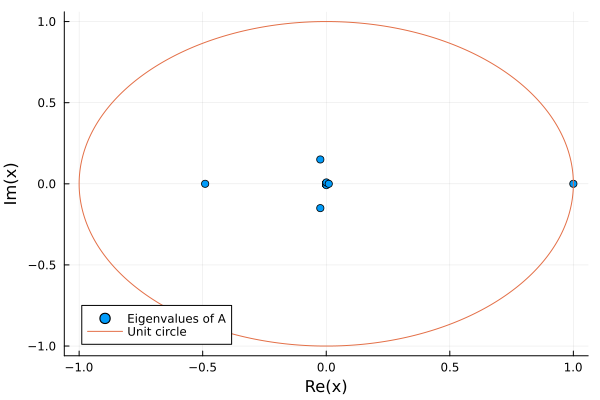

In [34]:
using Plots
scatter(F.values, label = "Eigenvalues of A")
plot!([cos(x) for x in 0:0.01:2*pi], [sin(x) for x in 0:0.01:2*pi], label = "Unit circle")

The matrix F.vectors contains numerical approximations, not verified of the eigenvalues of $A$

In [36]:
F.vectors               

257×257 Matrix{ComplexF64}:
         0.0+0.0im         …    0.862162+0.0im
    0.565836+0.0im              0.259411+0.000287363im
    0.312697-0.0901638im        0.174787+0.0509537im
    0.204878-0.0656197im        0.122907+0.0413455im
    0.128757-0.0449061im        0.080324+0.0293197im
   0.0756839-0.0279271im   …   0.0483626+0.0185373im
   0.0410568-0.0157715im       0.0266803+0.0105686im
   0.0204248-0.00808853im      0.0134412+0.00545314im
  0.00928487-0.00376644im     0.00617095+0.0025498im
  0.00384845-0.00159201im     0.00257838+0.00108097im
            ⋮              ⋱  
 0.000441255-0.0041413im      0.00257838-0.00108097im
 0.000993121-0.00997038im     0.00617095-0.0025498im
  0.00199581-0.0218772im   …   0.0134412-0.00545314im
  0.00354405-0.0438388im       0.0266803-0.0105686im
  0.00543371-0.0804888im       0.0483626-0.0185373im
  0.00674515-0.136196im         0.080324-0.0293197im
  0.00513528-0.215068im         0.122907-0.0413455im
  -0.0017452-0.325432im    …    0.174787

In [38]:
fσK = F.vectors[:, 257]   # this is going to be an approximation of our fixed point

257-element Vector{ComplexF64}:
    0.8621618559192298 + 0.0im
     0.259411322265627 + 0.00028736283984833643im
   0.17478720465601344 + 0.05095373174067641im
   0.12290673960817552 + 0.041345527266352294im
   0.08032399031782757 + 0.029319692800765153im
   0.04836263817291524 + 0.01853726831563606im
  0.026680347851871046 + 0.0105685643530462im
  0.013441193935186677 + 0.005453135414808872im
  0.006170952671736583 + 0.002549801279743561im
  0.002578379746454155 + 0.0010809684527433607im
                       ⋮
 0.0025783797464541684 - 0.0010809684527433162im
  0.006170952671736603 - 0.002549801279743561im
   0.01344119393518668 - 0.00545313541480885im
  0.026680347851870963 - 0.010568564353046197im
   0.04836263817291518 - 0.01853726831563609im
   0.08032399031782744 - 0.029319692800765323im
   0.12290673960817546 - 0.04134552726635253im
   0.17478720465601358 - 0.05095373174067653im
   0.25941132226562713 - 0.0002873628398483332im

$f_{\sigma,k}$ is fixed point of $A$

In [ ]:
fσK /= fσK[1] # we normalize it

257-element Vector{ComplexF64}:
    0.9999999999999999 + 0.0im
    0.3008847126379128 + 0.00033330497965715795im
   0.20273131252096135 + 0.05909996062902825im
   0.14255645707862288 + 0.047955644270842895im
   0.09316578988777785 + 0.034007179277845384im
  0.056094615924931396 + 0.021500914460976447im
   0.03094586900208509 + 0.01225821379186172im
  0.015590105086307475 + 0.006324955549088615im
  0.007157533854425936 + 0.002957450810700717im
 0.0029905982603522954 + 0.0012537883058985962im
                       ⋮
  0.002990598260352311 - 0.0012537883058985446im
  0.007157533854425959 - 0.002957450810700717im
  0.015590105086307478 - 0.00632495554908859im
  0.030945869002084993 - 0.012258213791861717im
   0.05609461592493133 - 0.02150091446097648im
   0.09316578988777771 - 0.034007179277845585im
    0.1425564570786228 - 0.04795564427084317im
   0.20273131252096152 - 0.059099960629028385im
    0.3008847126379129 - 0.00033330497965715415im

In the computer calculations, the symmetry of the point was lost. Now let's symmetrize the fixed point

In [40]:
fσKs = zeros(257) + zeros(257) * im
for i in 1:129
    fσKs[i] = fσK[i]
end

for i in 1:128
    fσKs[258-i] = conj(fσK[i+1])
end
fσKs                                

257-element Vector{ComplexF64}:
    0.9999999999999999 + 0.0im
    0.3008847126379128 + 0.00033330497965715795im
   0.20273131252096135 + 0.05909996062902825im
   0.14255645707862288 + 0.047955644270842895im
   0.09316578988777785 + 0.034007179277845384im
  0.056094615924931396 + 0.021500914460976447im
   0.03094586900208509 + 0.01225821379186172im
  0.015590105086307475 + 0.006324955549088615im
  0.007157533854425936 + 0.002957450810700717im
 0.0029905982603522954 + 0.0012537883058985962im
                       ⋮
 0.0029905982603522954 - 0.0012537883058985962im
  0.007157533854425936 - 0.002957450810700717im
  0.015590105086307475 - 0.006324955549088615im
   0.03094586900208509 - 0.01225821379186172im
  0.056094615924931396 - 0.021500914460976447im
   0.09316578988777785 - 0.034007179277845384im
   0.14255645707862288 - 0.047955644270842895im
   0.20273131252096135 - 0.05909996062902825im
    0.3008847126379128 - 0.00033330497965715795im


Note that
\begin{align*}
f_{\sigma,k,s}=(\mathcal{F}(f_{\sigma,k,s})[0],\mathcal{F}(f_{\sigma,k,s})[1],\ldots,\mathcal{F}(f_{\sigma,k,s})[K],\mathcal{F}(f_{\sigma,k,s})[-K],\ldots,\mathcal{F}(f_{\sigma,k,s})[-1])
\end{align*}


In [41]:
bfσKs = BallVector(fσKs)

257-element Vector{Ball{Float64, ComplexF64}}:
                      0.9999999999999999 + 0.0im ± 0.0
   0.3008847126379128 + 0.00033330497965715795im ± 0.0
     0.20273131252096135 + 0.05909996062902825im ± 0.0
    0.14255645707862288 + 0.047955644270842895im ± 0.0
    0.09316578988777785 + 0.034007179277845384im ± 0.0
   0.056094615924931396 + 0.021500914460976447im ± 0.0
     0.03094586900208509 + 0.01225821379186172im ± 0.0
   0.015590105086307475 + 0.006324955549088615im ± 0.0
   0.007157533854425936 + 0.002957450810700717im ± 0.0
 0.0029905982603522954 + 0.0012537883058985962im ± 0.0
                                                                               ⋮
 0.0029905982603522954 - 0.0012537883058985962im ± 0.0
   0.007157533854425936 - 0.002957450810700717im ± 0.0
   0.015590105086307475 - 0.006324955549088615im ± 0.0
     0.03094586900208509 - 0.01225821379186172im ± 0.0
   0.056094615924931396 - 0.021500914460976447im ± 0.0
    0.09316578988777785 - 0.034007179277845384i

We compute now the residuals of the fixed point with respect to all the matrices in the BallMatrix

In [44]:
residual = PσK * bfσKs - bfσKs

257-element Vector{Ball{Float64, ComplexF64}}:
                                        0.0 + 0.0im ± 1.7297598683812976e-13
  -2.7755575615628914e-16 - 3.513357139939277e-16im ± 1.6741147462846631e-13
   -3.885780586188048e-16 - 2.636779683484747e-16im ± 1.3303859320959926e-13
   -4.440892098500626e-16 + 1.457167719820518e-16im ± 1.0112910041784038e-13
    -5.412337245047638e-16 + 6.938893903907228e-17im ± 6.982209662361387e-14
   -1.249000902703301e-16 - 3.8163916471489756e-17im ± 4.406721076519777e-14
 -1.1796119636642288e-16 - 2.7755575615628914e-17im ± 2.6201273148754355e-14
  -3.122502256758253e-17 + 3.0357660829594124e-17im ± 1.3757344586247275e-14
   1.734723475976807e-18 - 1.3010426069826053e-17im ± 6.5290755729773614e-15
   1.7780915628762273e-17 - 2.862293735361732e-17im ± 2.8147677612559673e-15
                                                                                                     ⋮
   1.7780915628762273e-17 + 2.883977778811442e-17im ± 2.8147677612559673e-15
   

In [45]:
ϵ = norm(residual.c, 2) + norm(residual.r, 2)

3.9804238892558117e-13

To compute the value of the Lyapunov exponent we need to find an enclosure of the Fourier coefficients of 
$$
\ln|T'_{\alpha,\beta}|
$$

I already have bounded $|\lambda(\alpha,\beta,\sigma)-\lambda(\alpha,\beta,\sigma,k,s)|$, it remains to find $\lambda(\alpha,\beta,\sigma,k,s)$ but 
\begin{align*}
\lambda (\alpha,\beta,\sigma,k,s)&=\int_{-1}^{1}\ln|T'_{\alpha,\beta}|f_{\sigma,k,s}dm\\
&=\langle \ln|T'_{\alpha,\beta}|,f_{\sigma,k,s} \rangle\\
&=\displaystyle \sum_{j=-k}^{k}\mathcal{F}(\ln|T'_{\alpha,\beta}|)[j]\mathcal{F}(f_{\sigma,k,s})[j].
\end{align*}
$\mathcal{F}(f_{\sigma,k})[j]$ we have already calculated it, let's calculate $\mathcal{F}(\ln|T'_{\alpha,\beta}|)[j]$.

We now that

\begin{align*}
\mathcal{F}(ln|T'_{\alpha,\beta}|)[0]&=\ln (2\alpha \beta)-(\alpha-1)\\
\mathcal{F}(ln|T'_{\alpha,\beta}|)[j]&=-\frac{(\alpha-1)}{j\pi}\int_{0}^{1}\frac{1}{x}sen(j\pi x)dx\\
&=-\frac{(\alpha-1)}{j\pi}\int _{0}^{j\pi}\frac{sen(x)}{x}dx.
\end{align*}

We want to compute
$$
\frac{1}{j\pi}\int_0^{j\pi} \frac{sin(t)}{t}dt
$$
for $j\geq 1$ by using Taylor Models integration for $[\pi, j\pi]$.

To make the computation more efficient, we will 
compute 
$$
I_i = \int_{i\pi}^{(i+1)\pi}\frac{sin(t)}{t}dt
$$

In [46]:
f(t) = sin(t) / t

f (generic function with 1 method)

The  power series for $f$ at $x=0$ is
$$
f(x) = \sum_{i=0}^{+\infty}(-1)^i\frac{x^{2i}}{(2i+1)!}
$$
Then, the power series for the primitive is 
$$
F(x) = \sum_{i=0}^{+\infty}(-1)^i\frac{x^{2i+1}}{(2i+1)!(2i+1)}.
$$
We are going to use this Taylor series to approximate the integral only in the interval $[0, \pi]$.

We will bound the remainder of the series by using the alternating series remainder.

In [47]:
function coeff_eval_at_0(i, x)
    return x^(2i + 1) / (factorial(big(2i + 1)) * (2i + 1))
end

coeff_eval_at_0 (generic function with 1 method)

In [48]:
using IntervalArithmetic                                #No usa aqui Taylor Model porque no existe su serie de taylor pues la serie de taylor lo hace sacando la derivada y evaluando a en nuestro caro a=0, pero nosotros tenemos sen(t)/t el cual al derivar siempre tendra dividido por t^n y no se va poder remprazar para t=0
N = 1000

Pi = @biginterval π                                     # @interval(1)=[1,1], @interval(0.1)=[0.1,0.100001], @interval(x)= um intervalo fechado pequeno que contega x, @interval(1,2)=[1,2],@biginterval(1,2)=[1,2]_256 creo que va aceptar por ejemplo un decimal hasta la cifra 256
v = [(-1)^i * coeff_eval_at_0(i, Pi) for i in 0:N]        # como ja integro agora tem que valiar em \pi e 0, em verdad seria em jπ, mas ta tomando no intervalo [0,π] de momento
# i.e esta achando (-1)^{i}a_K, e os vota emcada coordenada de v, note que cada coordenadas é um intervalo pois Pi
error = Interval(-1, 1) * abs(coeff_eval_at_0(N + 1, Pi))   # error=[-a_{K+1},a_{K+1}], esto se tiene de Alternating series estimation theorem
@info error

integral_with_error = sum(v) + error                      # aqui esta sumando os primeros (-1)a_K + error e vai me sair um inervalo
integral_with_error, diam(integral_with_error)          # o diametri do intervalo que tem que ser muito pequeno

┌ Info: [-1.16004e-4753, 1.16004e-4753]₂₅₆
└ @ Main /home/isaia/Code/PlateauExperiment.jl/notebooks/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X45sZmlsZQ==.jl:8


([1.85193, 1.85194]₂₅₆, 1.746233281840096703253120346658240793279655273689016096051792841668089262599443e-74)

Therefore, we have computed $I_0$. We will now use 
Taylormodels to compute the value of the integrals
$$
\int_{i\pi}^{(i+1)\pi}\frac{sin(t)}{t}dt
$$
for $i>0$.

In [49]:
#import Pkg; Pkg.add("TaylorModels")
using TaylorModels

In [50]:
function integrate_i_i_plus_1(f, i; degree=40)            #aqui puede usar porque evalua las derivadas em m que es diferente de 0
    I = (@interval i * π (i + 1) * π)                             #esto es el intervalo [i*π,(i+1)*π], i>0
    m = Interval(IntervalArithmetic.mid(I))                                    #mid(I) ponto medio do intervalo I, Interval(mid(I))=un intervalo pequenho que contenga mid(I)
    tm = TaylorModel1(degree, m, I)                         #ese m es el valor que será evaluada en la serie de Taylos i.e f(m)+f'(m)t/1!+...+f^{(400)}(m)t^{400}/400!+erro
    prim = TaylorSeries.integrate(f(tm))                    #esto es la primitiva de f, al poner f(tm), recien esta diciendo quien va ser la función f para la cual voy hacer el polinomi de taylor i.e. para obtener la sumatoria que esta en la linea de arriba
    return prim(I.hi - m) - prim(I.lo - m)                        #I.hi, I.lo parte superior e inferior do intervalo I respectivamente, como m é um intervalo, vai ficar o intevalo prim([I.hi-m1,I.hi-m2])-prim([I.lo-m1,I.lo-m2]) where denotamos m=[m1,m2]
end

integrate_i_i_plus_1 (generic function with 1 method)

The vector `val` is containing at index $i$
the value of the integral
$$
\int_{i\pi}^{(i+1)\pi} \frac{\sin(t)}{t}dt
$$

In [51]:
val = [integral_with_error; [integrate_i_i_plus_1(f, i) for i in 1:K-1]] #aqui junta I_0+el resultado de la integrales [π,2π],[2π,3π],...,[2000π,2001π], en un vector

128-element Vector{Interval{BigFloat}}:
  [1.85193, 1.85194]₂₅₆
 [-0.433786, -0.433785]₂₅₆
  [0.25661, 0.256611]₂₅₆
 [-0.182601, -0.1826]₂₅₆
  [0.141803, 0.141804]₂₅₆
 [-0.115931, -0.11593]₂₅₆
  [0.0980515, 0.0980516]₂₅₆
 [-0.0849543, -0.0849542]₂₅₆
  [0.0749456, 0.0749457]₂₅₆
 [-0.0670479, -0.0670478]₂₅₆
   ⋮
 [-0.00532738, -0.00532737]₂₅₆
  [0.00528316, 0.00528317]₂₅₆
 [-0.00523969, -0.00523968]₂₅₆
  [0.00519691, 0.00519692]₂₅₆
 [-0.00515484, -0.00515483]₂₅₆
  [0.00511342, 0.00511343]₂₅₆
 [-0.00507269, -0.00507268]₂₅₆
  [0.00503258, 0.00503259]₂₅₆
 [-0.00499312, -0.00499311]₂₅₆

In [52]:
maximum(diam.(val))

1.609823385706476983614265918731689453125e-15

The cumulative sum vector below contains at the $i$-th index the value of the integral
$$
\int_0^{i\pi}\frac{\sin(t)}{t}dt
$$

In [53]:
cum_sum = cumsum(val)               #cumsum en cada coornenada suma lo anterior y lo pone ahí ejemplo v=(v_1,v_2,v_3,v_4)=(v_1,v_1+v_2,v_1+v_2+v_3,v_1+v_2+v_3+v_4)

128-element Vector{Interval{BigFloat}}:
 [1.85193, 1.85194]₂₅₆
 [1.41815, 1.41816]₂₅₆
 [1.67476, 1.67477]₂₅₆
 [1.49216, 1.49217]₂₅₆
 [1.63396, 1.63397]₂₅₆
 [1.51803, 1.51804]₂₅₆
 [1.61608, 1.61609]₂₅₆
 [1.53113, 1.53114]₂₅₆
 [1.60607, 1.60608]₂₅₆
 [1.53902, 1.53903]₂₅₆
  ⋮
 [1.56814, 1.56815]₂₅₆
 [1.57342, 1.57343]₂₅₆
 [1.56818, 1.56819]₂₅₆
 [1.57338, 1.57339]₂₅₆
 [1.56822, 1.56823]₂₅₆
 [1.57334, 1.57335]₂₅₆
 [1.56827, 1.56828]₂₅₆
 [1.5733, 1.57331]₂₅₆
 [1.5683, 1.56831]₂₅₆

The vector `coeff` contains at the index $i$ the value of
$$
\frac{1}{i\pi}\int_0^{i\pi} \frac{\sin(t)}{t}dt.
$$

In [54]:
coeff = cum_sum ./ ([i * @interval π for i in 1:K])         #aqui solo le esta dividiendo por iπ a cada integral

128-element Vector{Interval{BigFloat}}:
 [0.589489, 0.58949]₂₅₆
 [0.225705, 0.225706]₂₅₆
 [0.177697, 0.177698]₂₅₆
 [0.118742, 0.118743]₂₅₆
 [0.104021, 0.104022]₂₅₆
 [0.0805342, 0.0805343]₂₅₆
 [0.0734879, 0.073488]₂₅₆
 [0.0609217, 0.0609218]₂₅₆
 [0.0568033, 0.0568034]₂₅₆
 [0.0489888, 0.0489889]₂₅₆
  ⋮
 [0.00415963, 0.00415964]₂₅₆
 [0.00413915, 0.00413916]₂₅₆
 [0.00409155, 0.00409156]₂₅₆
 [0.00407173, 0.00407174]₂₅₆
 [0.00402566, 0.00402567]₂₅₆
 [0.00400648, 0.00400649]₂₅₆
 [0.00396187, 0.00396188]₂₅₆
 [0.00394328, 0.00394329]₂₅₆
 [0.00390006, 0.00390007]₂₅₆

I want
\begin{align*}
\mathcal{F}(ln|T'_{\alpha,\beta}|)[0]&=\ln ((1+\beta)\alpha)-(\alpha-1)\\
\mathcal{F}(ln|T'_{\alpha,\beta}|)[j]&=-\frac{(\alpha-1)}{j\pi}\int_{0}^{1}\frac{1}{x}sen(j\pi x)dx\\
&=-\frac{(\alpha-1)}{j\pi}\int _{0}^{j\pi}\frac{sen(x)}{x}dx.
\end{align*}
then

These are only the positive frequencies, so, we need to 
think about how to complete the vectore before taking the IFFT. 

In [63]:
coeff_fft = [coeff; reverse(coeff[1:end])] #hallamos la mitad, ahora como es simetrico tamos escribiendo la otra mitad que falta ussando lo que ya tenemos

256-element Vector{Interval{BigFloat}}:
 [0.589489, 0.58949]₂₅₆
 [0.225705, 0.225706]₂₅₆
 [0.177697, 0.177698]₂₅₆
 [0.118742, 0.118743]₂₅₆
 [0.104021, 0.104022]₂₅₆
 [0.0805342, 0.0805343]₂₅₆
 [0.0734879, 0.073488]₂₅₆
 [0.0609217, 0.0609218]₂₅₆
 [0.0568033, 0.0568034]₂₅₆
 [0.0489888, 0.0489889]₂₅₆
  ⋮
 [0.0568033, 0.0568034]₂₅₆
 [0.0609217, 0.0609218]₂₅₆
 [0.0734879, 0.073488]₂₅₆
 [0.0805342, 0.0805343]₂₅₆
 [0.104021, 0.104022]₂₅₆
 [0.118742, 0.118743]₂₅₆
 [0.177697, 0.177698]₂₅₆
 [0.225705, 0.225706]₂₅₆
 [0.589489, 0.58949]₂₅₆

We need now to take into account the constants $\alpha$ and $\beta$

In [65]:
ln = [log((1 + β) * α) - (α - 1); -(α - 1) * coeff_fft]  

257-element Vector{Interval{BigFloat}}:
 [-0.55409, -0.554089]₂₅₆
 [-1.47373, -1.47372]₂₅₆
 [-0.564265, -0.564264]₂₅₆
 [-0.444245, -0.444244]₂₅₆
 [-0.296857, -0.296856]₂₅₆
 [-0.260054, -0.260053]₂₅₆
 [-0.201336, -0.201335]₂₅₆
 [-0.18372, -0.183719]₂₅₆
 [-0.152305, -0.152304]₂₅₆
 [-0.142009, -0.142008]₂₅₆
   ⋮
 [-0.142009, -0.142008]₂₅₆
 [-0.152305, -0.152304]₂₅₆
 [-0.18372, -0.183719]₂₅₆
 [-0.201336, -0.201335]₂₅₆
 [-0.260054, -0.260053]₂₅₆
 [-0.296857, -0.296856]₂₅₆
 [-0.444245, -0.444244]₂₅₆
 [-0.564265, -0.564264]₂₅₆
 [-1.47373, -1.47372]₂₅₆

Since these were the coefficients computed on the Fourier basis of $[-1,1]$ we need to convert them to the coefficients in the Fourier Basis of $[0,1]$,
i.e., we need to apply the coordinate change.

In [66]:
lnn = zeros(Interval, 257) #2*K+1
lnn[1] = ln[1]
for i in 2:129
    lnn[i] = (-1)^(i + 1) * ln[i]
end
for i in 130:257
    lnn[i] = (-1)^(i) * ln[i]
end
IntervalArithmetic.mid.(lnn[1:10])

10-element Vector{BigFloat}:
 -0.55408985094468665710820687309023924171924591064453125
  1.473724680590209041076980177390027844590372816605206698704616123222914587525631
 -0.5642645834876753803095431564153812880035676273970467547636290280855152214809341
  0.4442443646818932980782779723433063681265083207188845384076830624784711068336347
 -0.2968560436772844154464813963893048737572071371519050564943305027176029545611116
  0.2600535820956542355377282868106769370347884112833443901264715771484290576347021
 -0.2013355072907279590344548253986138016388467181729300645925040762422166938702733
  0.1837199989726090084462220225816129193471935374666277468325879372574944467414919
 -0.1523044453305687348361016999866777010047705607866674933993147861658668704588732
  0.1420083757324992802798566818260271725339171018589546009829085463509149607806938

\begin{align*}
ln=(\mathcal{F}(\ln|T'_{\alpha,\beta}|)[0],\mathcal{F}(\ln|T'_{\alpha,\beta}|)[1],\ldots,\mathcal{F}(\ln|T'_{\alpha,\beta}|)[K],\mathcal{F}(\ln|T'_{\alpha,\beta}|)[-K],\ldots,\mathcal{F}(\ln|T'_{\alpha,\beta}|)[-1])
\end{align*}

Finally
\begin{align*}
\lambda (\alpha,\beta,\sigma,k)=\displaystyle \sum_{j=-k}^{k}\mathcal{F}(\ln|T'_{\alpha,\beta}|)[j]\mathcal{F}(f_{\sigma,k})[j].
\end{align*}


In [68]:
λ_k = 0 + im * 0
for i in 1:2*K+1
    λ_k = lnn[i] * fσKs[i] + λ_k
end
λ_k  

[0.196215, 0.196216]₂₅₆ + [-1.35729e-16, 1.35729e-16]₂₅₆im

Now to limit $\|f_{\sigma}-f_{\sigma,k,s}\|$ we use the following result

Let $f_{\sigma}$ be the unique fixed point of $L_{\sigma}$ and $f_{\sigma,k}$ be the unique fixed point of $L_{\sigma,k}$ and $f_{\sigma,k,s}$ symmetrization of $f_{k,s}$. Suppose that there exists $n \in \mathbb{N}$ and $\eta>0$ such that 
\begin{align*}
\|L_{\sigma,k }^{n}|_{V}\|_{L^{2}\rightarrow L^{2}}\leq \eta <1,	
\end{align*}
where $V$ be the zero average subspace of $L^{2}$, then if $1\leq C_i $ are such that $\|L^i_{\sigma,k}|_V\|_{L^{2}\rightarrow L^{2}}\leq C_i$ for $1\leq i \leq n-1$, we have
\begin{align*}
\|f_{\sigma}-f_{\sigma,k,s}\|_{L^{2}}\leq \frac{1}{1-\eta}\displaystyle \sum _{i=0}^{n-1}C_i((1+\Gamma_{\sigma,k}+\|\rho_{\sigma}\|_{L^{2}})\Gamma_{\sigma,k}\|f_{\sigma}\|_{L^1}+\epsilon).
\end{align*}

Remark that $\epsilon$ is the residual with respect to the approximation of the fixed point.

In [70]:
σ = interval(σ)
Γ = ((1 / (sqrt(σ^2 * 2 * interval(π))))exp((-σ^2 * K^2 * interval(π)^2) / 2))   #para σ=0,1 e K=128, Γ=3.03*10^(-702)

[0, 1.97627e-323]

We apply now the Theorem, by computing bounds for the norm of the operator restricted to the space of average $0$ measures.

In [72]:
A = PσK[2:end, 2:end]

Aiter = A

C = zeros(10)
η = 0
n_0 = 0
for n in 1:10
    θ = BallArithmetic.svd_bound_L2_opnorm(Aiter)
    if θ > 1
        C[n] = θ
    else
        global η = θ
        global n_1 = n                                    #usso n_1 porque mas adelante usso n_0
        break                                           #para que pare y no siga corriendo n, sino el η me va salir más chico
    end
    Aiter *= A 
end
η, C

(0.9192775043174132, [1.1899603133946075, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

In [73]:
ρ1 = 1 / (sqrt(σ^2 * 2 * interval(π)))
ρn = sqrt(ρ1)


[1.99735, 1.99736]

In [74]:
#ya tenho ϵ, os C_i, η,h, n_1 é dizer ate onde vai asumatoria, |u|=1, e usei PK o operador de tranferencia finito, pero creo que tiene que ser el operador de transferencia infinito, só me falta K
R_1 = 0                                             #ja tenho todos os valos que preciso ahora só resta fazer a sumatoria
for i in 1:n_1-1
    global R_1 = R_1 + C[i] * ((1 + Γ + ρn)Γ + ϵ)
end
R_1 = (1 / (1 - η)) * R_1

[5.86769e-12, 5.8677e-12]

In [75]:
#el intervalo donde estaria λ seria
@biginterval(real.(λ_k) - Υ * R_1, real.(λ_k) + Υ * R_1) + im * @biginterval(imag.(λ_k) - Υ * R_1, imag.(λ_k) + Υ * R_1)

[0.196215, 0.196216]₂₅₆ + [-2.09018e-11, 2.09018e-11]₂₅₆im

We can observe that the integral must be a real number, so, we can restrict the enclosure to the real line

In [76]:
@biginterval(real.(λ_k) - Υ * R_1, real.(λ_k) + Υ * R_1)

[0.196215, 0.196216]₂₅₆